1. Membaca data...

Struktur data awal:
   No            Keterangan     2017     2018  2019  2020  2021  2022  2023  \
0   1     Investasi Lainnya  3071.62   308.28   569  3624  3372  7870  4602   
1   2               A. Aset  2764.04   551.78   306  2321  1199  3000  3339   
2   3      1. Sektor publik     1.76     1.89     0     0     0     0    69   
3   4      2. Sektor swasta  2765.80   549.89   306  2321  1199  3000  3270   
4   5  a. Uang dan simpanan  1731.12  1062.65   118   139   391   148   409   

    2024  
0  15778  
1  17974  
2    864  
3  17110  
4   6581  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          29 non-null     int64  
 1   Keterangan  29 non-null     object 
 2   2017        29 non-null     float64
 3   2018        29 non-null     float64
 4   2019        29 non-null     int64  
 5   2020     

posx and posy should be finite values
posx and posy should be finite values


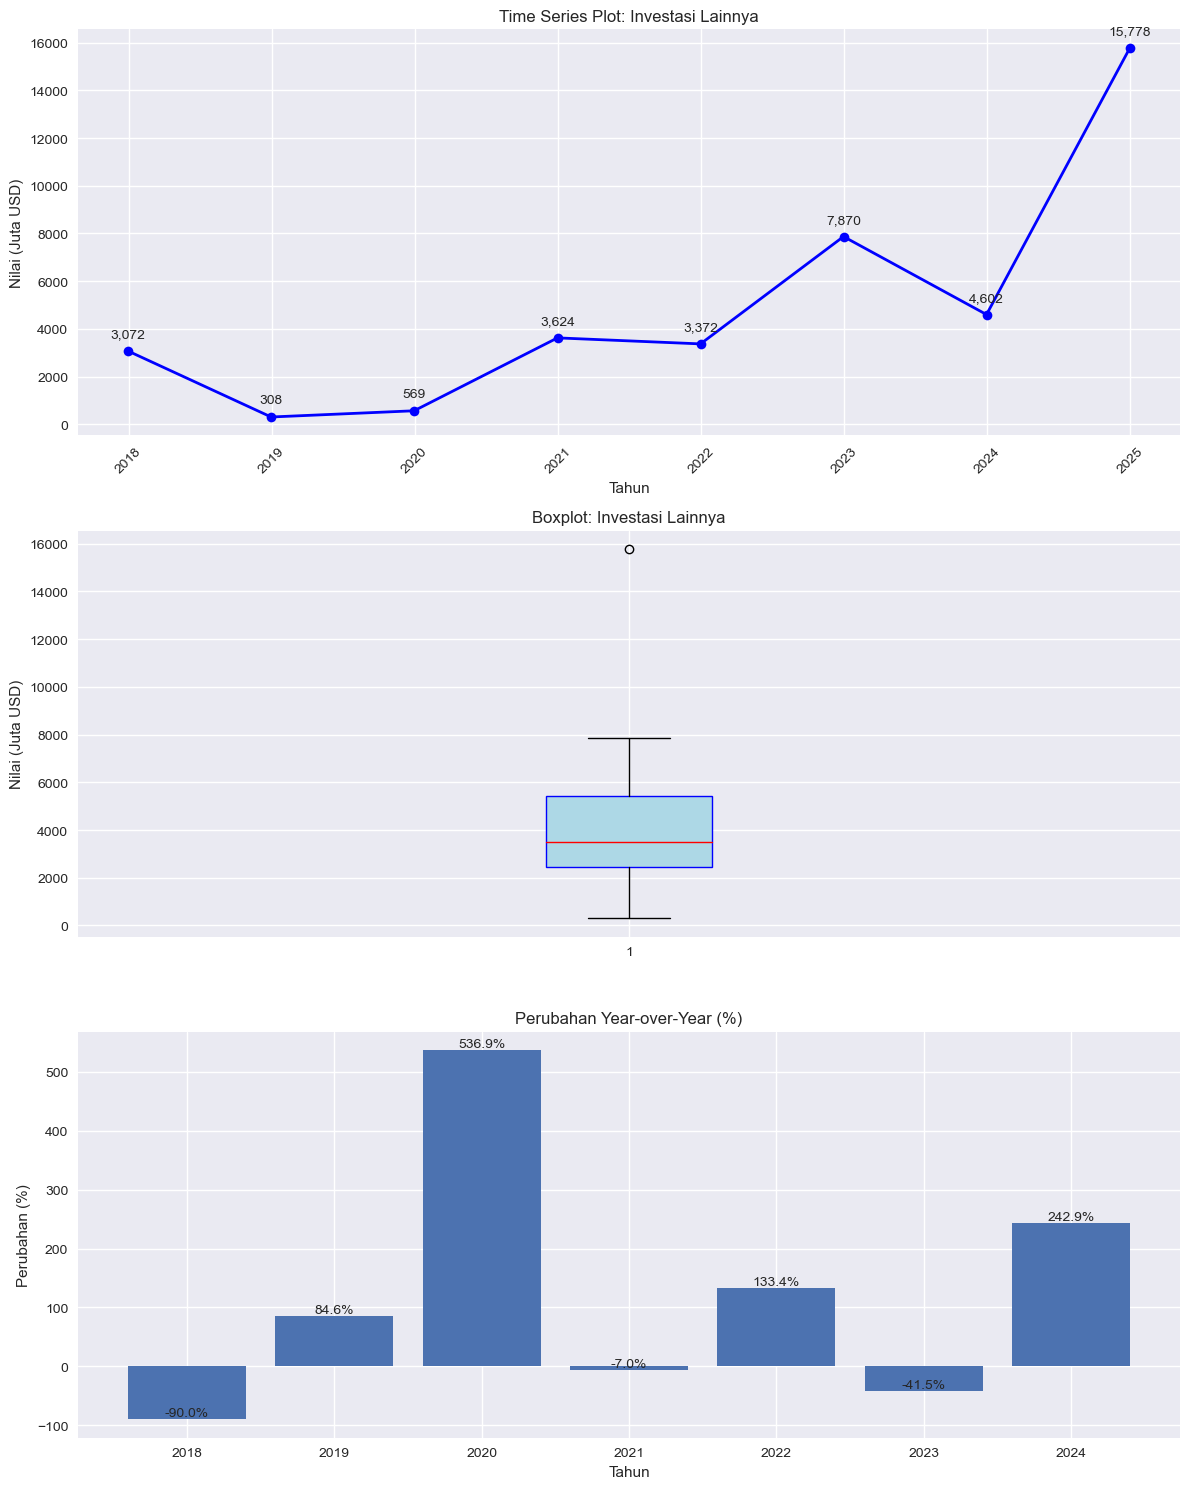


Analisis Perubahan Year-over-Year:
count      7.000000
mean     122.754411
std      214.700271
min      -89.963602
25%      -24.239210
50%       84.572467
75%      188.121790
max      536.906854
Name: Investasi Lainnya, dtype: float64

Data telah disimpan ke '../data/time_series_data.csv'

Insight dari Analisis Awal:
------------------------------
1. Rata-rata nilai: 4,899.36 Juta USD
2. Nilai tertinggi: 15,778.00 Juta USD (Tahun 2024)
3. Nilai terendah: 308.28 Juta USD (Tahun 2018)
4. Volatilitas: 101.88%
5. Tren: Meningkat (1,572.19 Juta USD/tahun)
6. Pola Musiman: Ada pola musiman yang signifikan


In [43]:
# 1. Persiapan Data dan Exploratory Data Analysis
# ===========================================

# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

# Baca data
def load_data():
    print("1. Membaca data...")
    numeric_cols = ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
    
    # Baca data dengan dtype yang sesuai
    df = pd.read_csv('../data/TABEL5_8.csv', 
                     delimiter=';',
                     dtype={col: str for col in numeric_cols})
    
    # Konversi kolom numerik
    for col in numeric_cols:
        # Bersihkan dan konversi data
        df[col] = (df[col].str.strip()
                         .str.replace('-', '0')
                         .str.replace('.', '')
                         .str.replace(',', '.')
                         .replace('', '0'))
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    print("\nStruktur data awal:")
    print(df.head())
    print("\nInfo dataset:")
    print(df.info())
    
    # Transpose data untuk analisis time series
    print("\n2. Mempersiapkan data time series...")
    df_ts = df.set_index(['No', 'Keterangan'])[numeric_cols].T
    df_ts.index = pd.to_datetime(df_ts.index, format='%Y')
    print("\nStruktur data time series:")
    print(df_ts.head())
    
    return df, df_ts

# Eksplorasi data
def explore_data(df, df_ts):
    print("\n3. Analisis Deskriptif")
    print("----------------------")
    
    # Pilih seri Investasi Lainnya
    investasi_lainnya = df[df['Keterangan'] == 'Investasi Lainnya'].iloc[0]
    years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
    values = [investasi_lainnya[year] for year in years]
    
    # Buat time series dengan index yang benar
    ts = pd.Series(
        data=values,
        index=pd.date_range(start='2017', periods=8, freq='Y'),
        name='Investasi Lainnya'
    )
    
    print("\nStatistik deskriptif untuk Investasi Lainnya:")
    print(ts.describe())
    
    # Visualisasi data
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    
    # Time Series Plot
    ax1.plot(ts.index, ts.values, marker='o', linewidth=2, color='blue')
    ax1.set_title('Time Series Plot: Investasi Lainnya')
    ax1.set_xlabel('Tahun')
    ax1.set_ylabel('Nilai (Juta USD)')
    ax1.grid(True)
    ax1.tick_params(axis='x', rotation=45)
    
    # Tambahkan nilai di atas titik
    for x, y in zip(ts.index, ts.values):
        ax1.annotate(f'{y:,.0f}', 
                    (x, y), 
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center')
    
    # Boxplot
    bp = ax2.boxplot(ts.dropna(), patch_artist=True)
    ax2.set_title('Boxplot: Investasi Lainnya')
    ax2.set_ylabel('Nilai (Juta USD)')
    ax2.grid(True)
    
    # Customize boxplot colors
    plt.setp(bp['boxes'], color='blue', facecolor='lightblue')
    plt.setp(bp['medians'], color='red')
    
    # Year-over-Year Change
    yearly_change = ts.pct_change() * 100
    bars = ax3.bar(yearly_change.index.year, yearly_change.values)
    ax3.set_title('Perubahan Year-over-Year (%)')
    ax3.set_xlabel('Tahun')
    ax3.set_ylabel('Perubahan (%)')
    ax3.grid(True)
    
    # Tambahkan nilai di atas bar
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., 
                height,
                f'{height:,.1f}%',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("\nAnalisis Perubahan Year-over-Year:")
    print(yearly_change.describe())
    
    return ts

if __name__ == "__main__":
    # Load dan eksplorasi data
    df, df_ts = load_data()
    ts = explore_data(df, df_ts)
    
    # Simpan data time series untuk digunakan di notebook berikutnya
    ts.to_csv('../data/time_series_data.csv')
    print("\nData telah disimpan ke '../data/time_series_data.csv'")
    
    # Tampilkan beberapa insight
    print("\nInsight dari Analisis Awal:")
    print("-" * 30)
    print(f"1. Rata-rata nilai: {ts.mean():,.2f} Juta USD")
    print(f"2. Nilai tertinggi: {ts.max():,.2f} Juta USD (Tahun {ts.idxmax().year})")
    print(f"3. Nilai terendah: {ts.min():,.2f} Juta USD (Tahun {ts.idxmin().year})")
    volatility = ts.std() / abs(ts.mean()) * 100
    print(f"4. Volatilitas: {volatility:.2f}%")
    
    # Analisis tren
    trend = np.polyfit(range(len(ts)), ts.values, 1)[0]
    print(f"5. Tren: {'Menurun' if trend < 0 else 'Meningkat'} ({abs(trend):,.2f} Juta USD/tahun)")
    
    # Analisis seasonal (jika ada)
    seasonal_diff = ts.diff(4)  # 4-year seasonal difference
    if not seasonal_diff.dropna().empty:
        seasonal_pattern = "Ada" if seasonal_diff.std() > ts.std() * 0.3 else "Tidak ada"
        print(f"6. Pola Musiman: {seasonal_pattern} pola musiman yang signifikan")

C:\Users\hp\AppData\Local\Temp\ipykernel_5492\1514742739.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Analisis Stasioneritas Data Asli


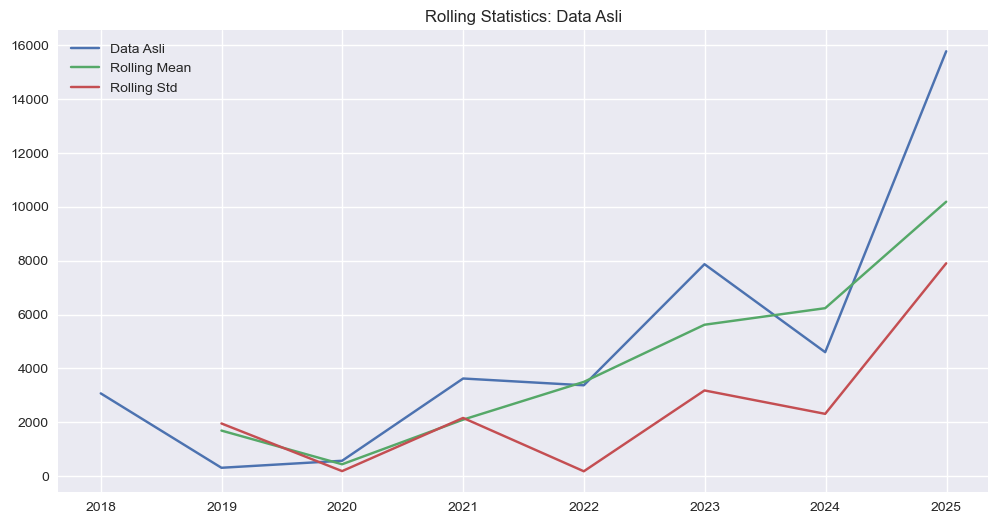


Hasil Uji Augmented Dickey-Fuller:
ADF Statistic: 0.9664573301012548
p-value: 0.9938991189520232
Critical values:
	1%: -5.354256481481482
	5%: -3.6462381481481483
	10%: -2.901197777777778

Kesimpulan: Data tidak stasioner

Mencoba berbagai transformasi untuk membuat data stasioner...

=== First Difference ===


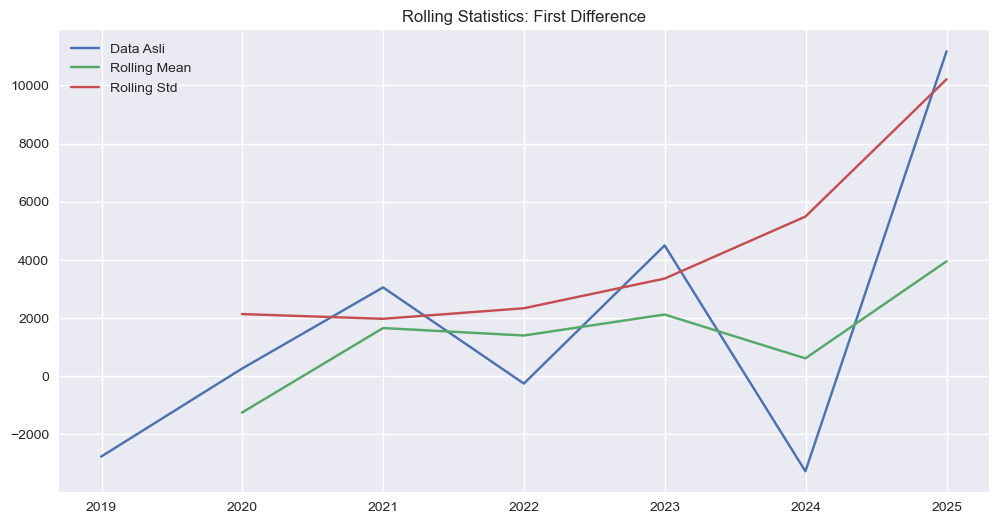


Hasil Uji Augmented Dickey-Fuller:
ADF Statistic: -8.076579054607828
p-value: 1.4998770241962232e-12
Critical values:
	1%: -6.045114
	5%: -3.9292800000000003
	10%: -2.98681

Kesimpulan: Data stasioner
✓ First Difference berhasil membuat data stasioner

=== Log Transform ===


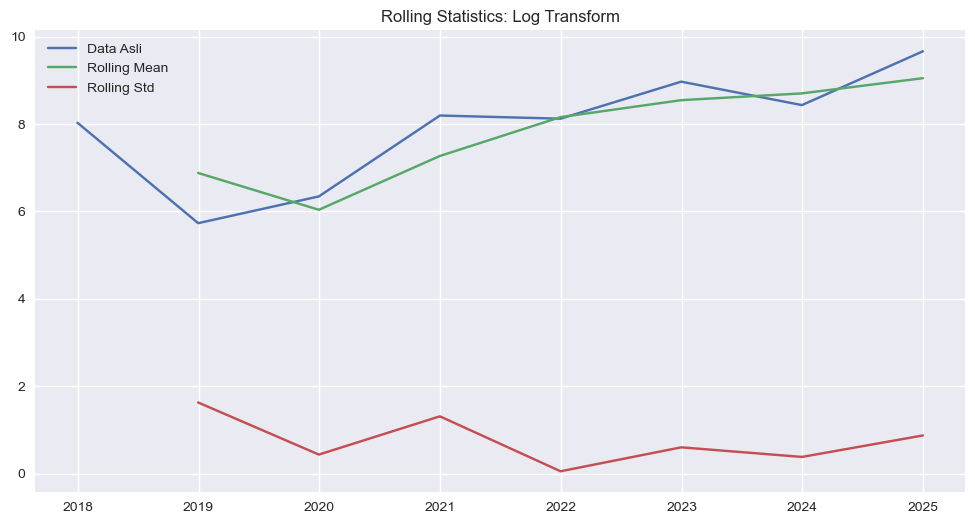


Hasil Uji Augmented Dickey-Fuller:
ADF Statistic: -0.8667912802606955
p-value: 0.7987117664990278
Critical values:
	1%: -5.354256481481482
	5%: -3.6462381481481483
	10%: -2.901197777777778

Kesimpulan: Data tidak stasioner

=== Square Root Transform ===


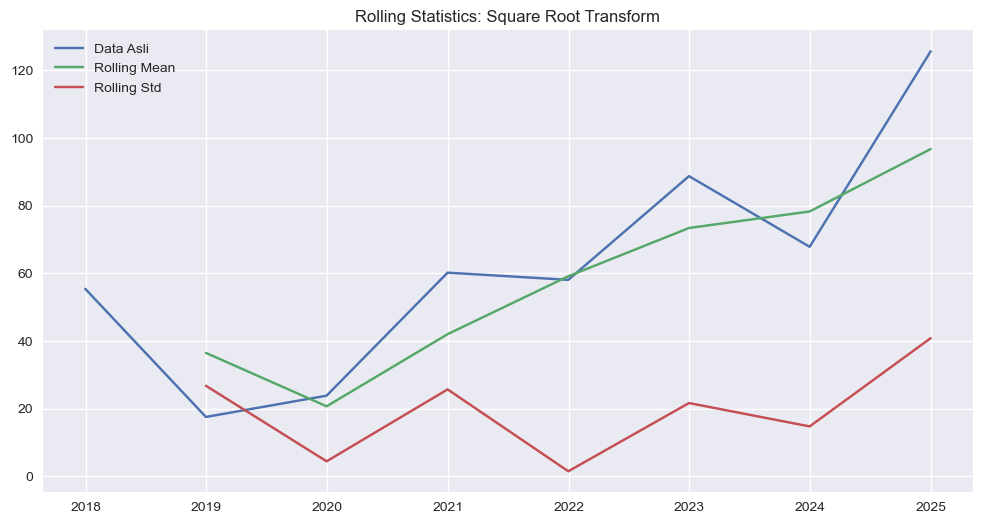


Hasil Uji Augmented Dickey-Fuller:
ADF Statistic: 0.11367530521063385
p-value: 0.9669824628711939
Critical values:
	1%: -5.354256481481482
	5%: -3.6462381481481483
	10%: -2.901197777777778

Kesimpulan: Data tidak stasioner

Hasil transformasi telah disimpan


In [44]:
# 2. Analisis Stasioneritas
# =======================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log, sqrt, exp
plt.style.use('seaborn')

def load_ts_data():
    ts = pd.read_csv('../data/time_series_data.csv', index_col=0, parse_dates=True)
    return ts

def check_stationarity(ts, title=''):
    """
    Fungsi untuk mengecek stasioneritas dengan:
    1. Rolling statistics
    2. Augmented Dickey-Fuller test
    """
    # Plot rolling statistics
    rolmean = ts.rolling(window=2).mean()
    rolstd = ts.rolling(window=2).std()
    
    plt.figure(figsize=(12, 6))
    plt.plot(ts, label='Data Asli')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.title(f'Rolling Statistics: {title}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Augmented Dickey-Fuller test
    print('\nHasil Uji Augmented Dickey-Fuller:')
    result = adfuller(ts.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    is_stationary = result[1] < 0.05
    print(f'\nKesimpulan: Data {"" if is_stationary else "tidak "}stasioner')
    return is_stationary

def make_stationary(ts):
    """
    Mencoba beberapa transformasi untuk membuat data stasioner:
    1. Differencing
    2. Log transform
    3. Square root transform
    """
    transformations = {}
    
    # 1. First difference
    ts_diff = ts.diff().dropna()
    transformations['First Difference'] = ts_diff
    
    # 2. Log transform (jika data positif)
    if all(ts > 0):
        ts_log = log(ts)
        transformations['Log Transform'] = ts_log
    
    # 3. Square root transform (jika data positif)
    if all(ts > 0):
        ts_sqrt = sqrt(ts)
        transformations['Square Root Transform'] = ts_sqrt
    
    # Plot dan test semua transformasi
    for name, transformed_ts in transformations.items():
        print(f"\n=== {name} ===")
        is_stationary = check_stationarity(transformed_ts, title=name)
        if is_stationary:
            print(f"✓ {name} berhasil membuat data stasioner")
    
    return transformations

if __name__ == "__main__":
    # Load data
    ts = load_ts_data()
    
    # Cek stasioneritas data asli
    print("Analisis Stasioneritas Data Asli")
    print("================================")
    is_stationary = check_stationarity(ts, title='Data Asli')
    
    # Jika tidak stasioner, lakukan transformasi
    if not is_stationary:
        print("\nMencoba berbagai transformasi untuk membuat data stasioner...")
        transformations = make_stationary(ts)
        
        # Simpan hasil transformasi
        for name, transformed_ts in transformations.items():
            transformed_ts.to_csv(f'../data/transformed_{name.lower().replace(" ", "_")}.csv')
        print("\nHasil transformasi telah disimpan")

Dekomposisi Time Series

Dekomposisi Data Asli:


C:\Users\hp\AppData\Local\Temp\ipykernel_5492\2123626627.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


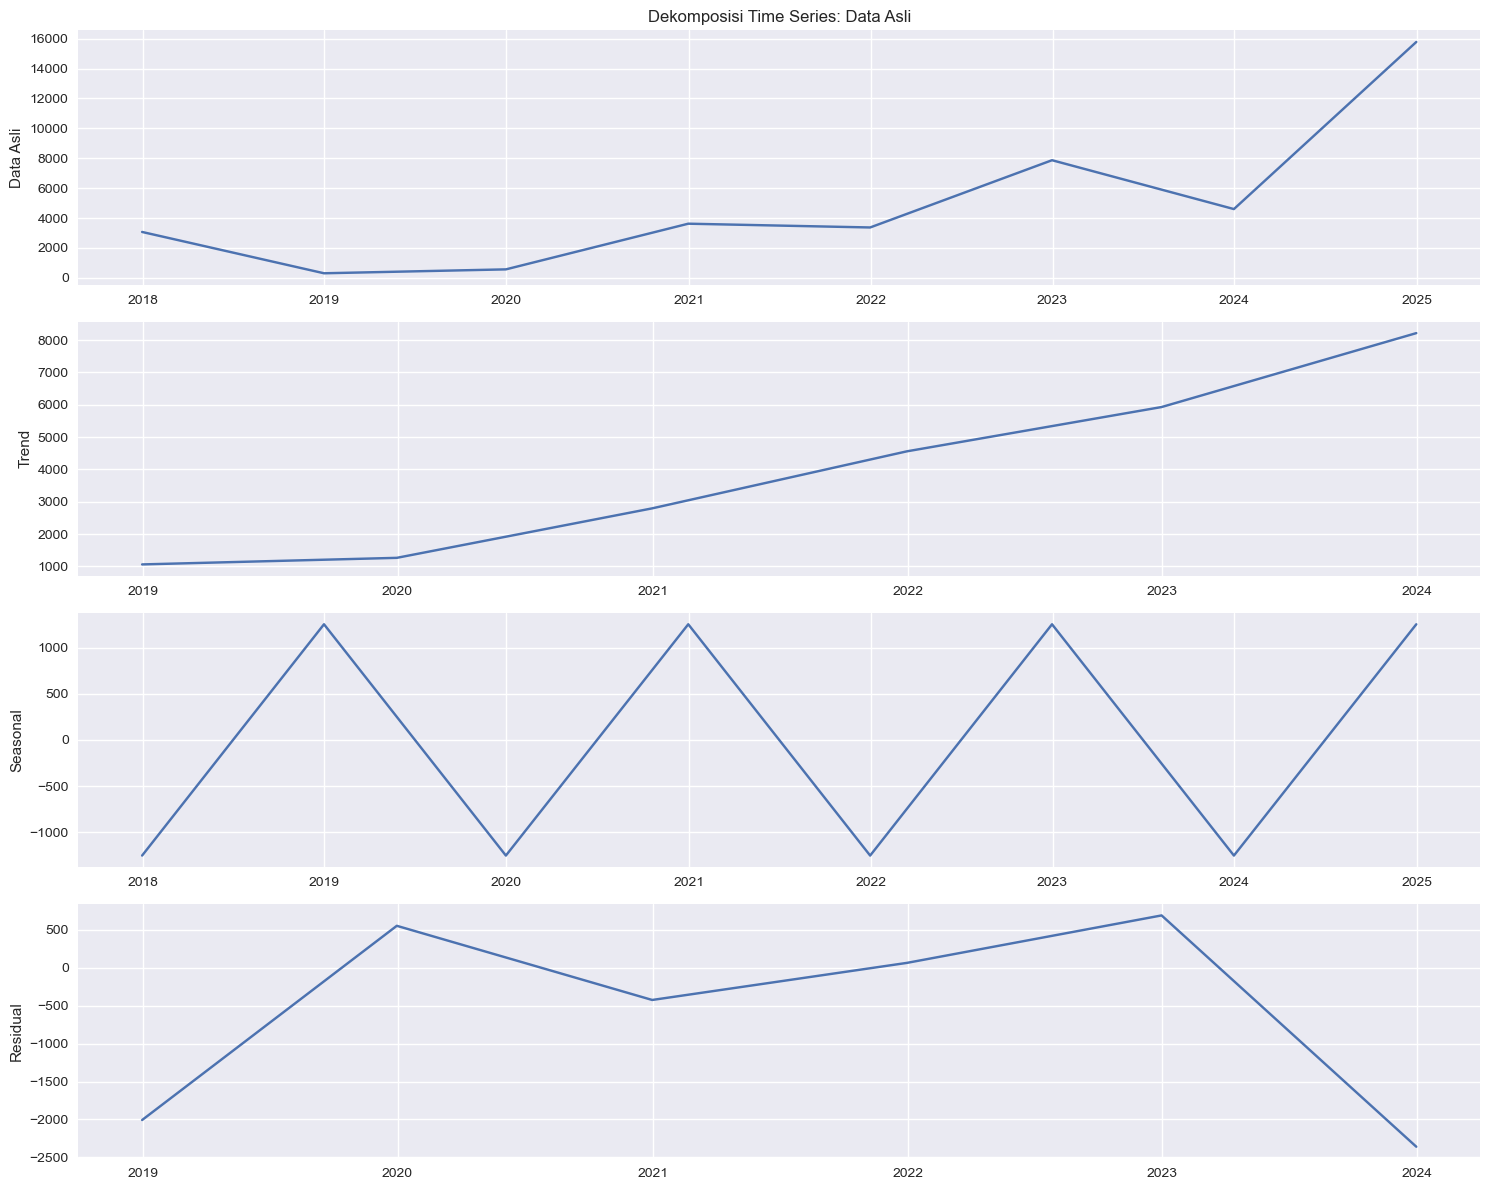


Analisis Komponen untuk Data Asli:
--------------------------------
Trend:
count       6.000000
mean     3971.685833
std      2803.849370
min      1064.295000
25%      1649.990000
50%      3678.375000
75%      5586.250000
max      8213.000000
Name: trend, dtype: float64

Seasonal:
count       8.000000
mean        0.000000
std      1337.964120
min     -1251.550833
25%     -1251.550833
50%         0.000000
75%      1251.550833
max      1251.550833
Name: seasonal, dtype: float64

Residual:
count       6.000000
mean     -580.805833
std      1306.880588
min     -2359.449167
25%     -1611.874583
50%      -180.375000
75%       430.748333
max       689.949167
Name: resid, dtype: float64


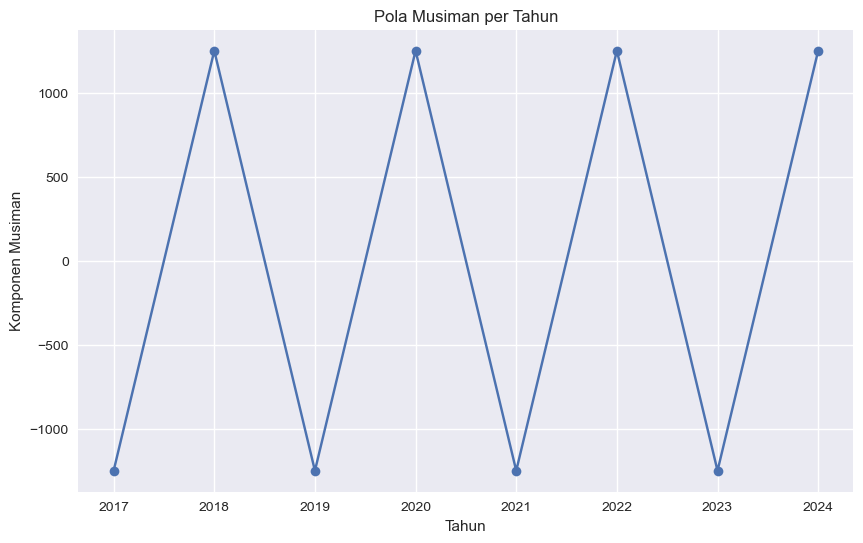


Analisis Kekuatan Musiman:
Variance total: 21798496.47
Variance musiman: 1566379.49
Kekuatan musiman: 7.19%

Dekomposisi Data Transformasi:


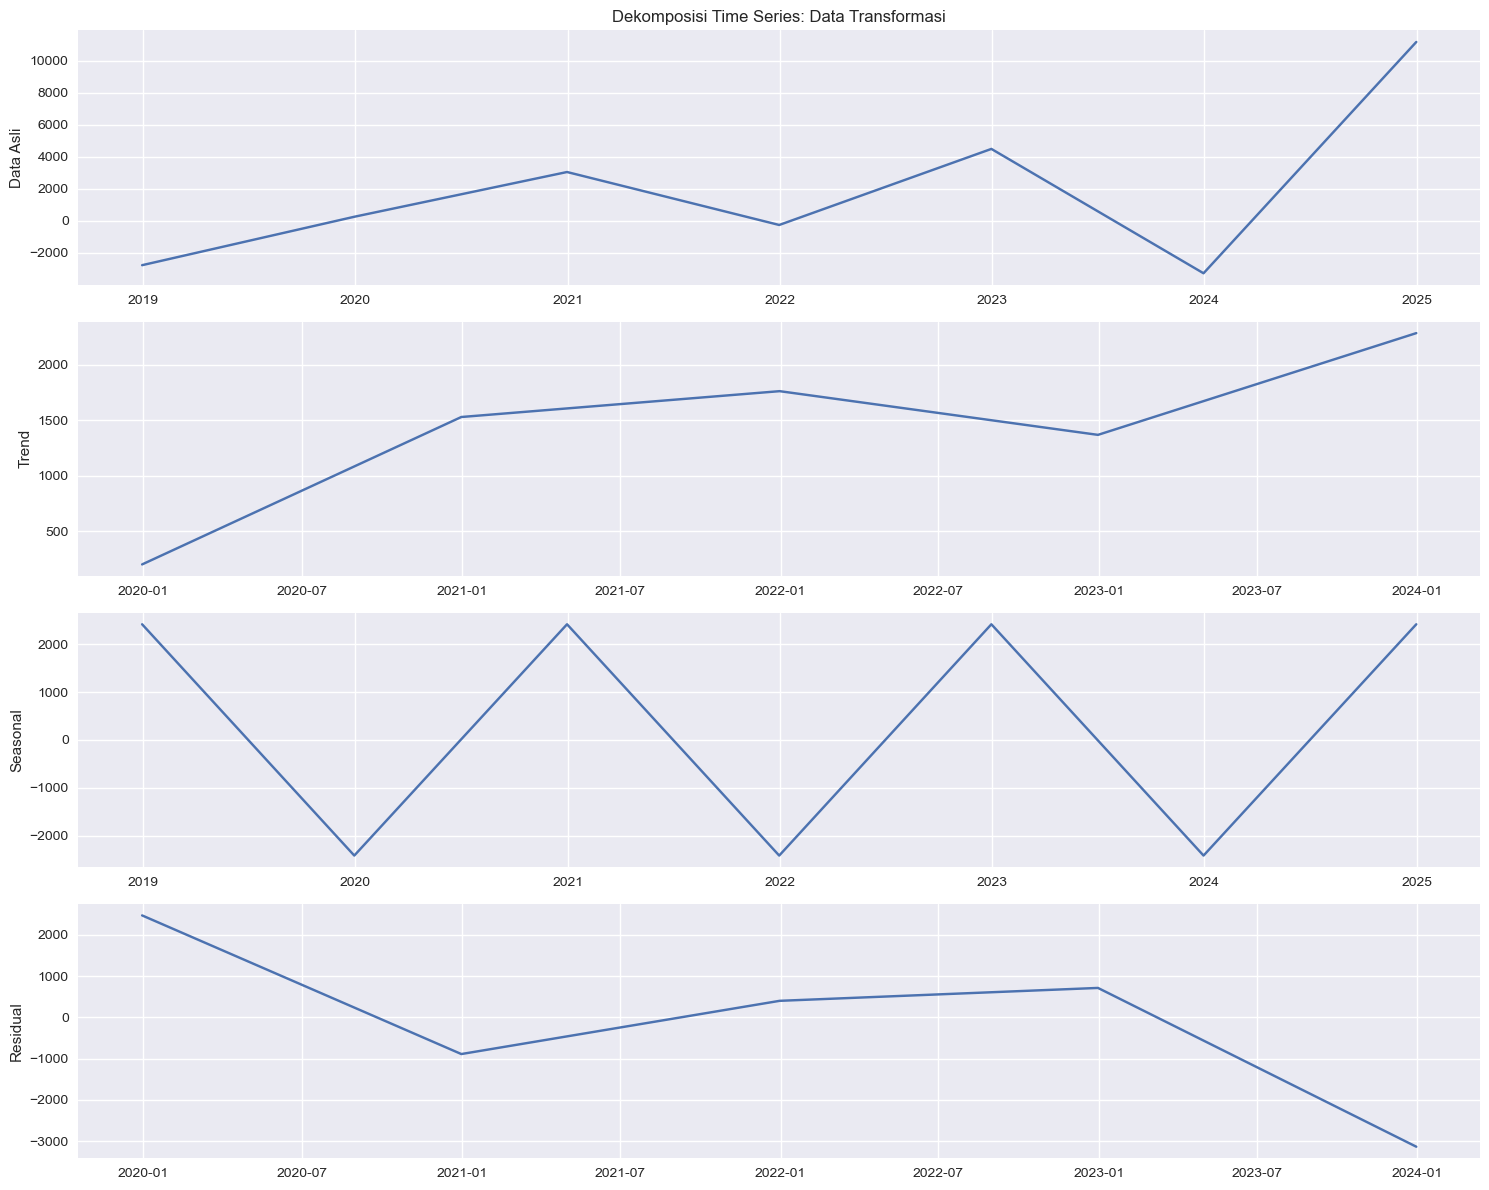


Analisis Komponen untuk Data Transformasi:
--------------------------------
Trend:
count       5.000000
mean     1429.741000
std       767.963428
min       203.275000
25%      1369.000000
50%      1529.680000
75%      1762.250000
max      2284.500000
Name: trend, dtype: float64

Seasonal:
count       7.000000
mean      345.018690
std      2581.883464
min     -2415.130833
25%     -2415.130833
50%      2415.130833
75%      2415.130833
max      2415.130833
Name: seasonal, dtype: float64

Residual:
count       5.000000
mean      -87.970833
std      2084.472364
min     -3137.369167
25%      -889.810833
50%       400.880833
75%       713.869167
max      2472.575833
Name: resid, dtype: float64


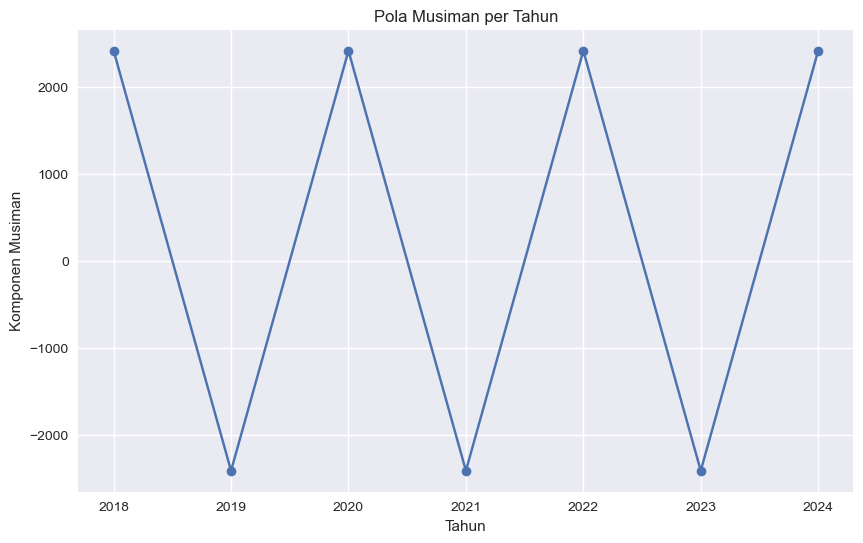


Analisis Kekuatan Musiman:
Variance total: 21407253.03
Variance musiman: 5713819.05
Kekuatan musiman: 26.69%


In [45]:
# 3. Dekomposisi Time Series
# ========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('seaborn')

def load_data():
    # Load data asli dan transformasi terbaik
    ts_original = pd.read_csv('../data/time_series_data.csv', index_col=0, parse_dates=True)
    try:
        ts_transformed = pd.read_csv('transformed_first_difference.csv', 
                                   index_col=0, parse_dates=True)
    except:
        ts_transformed = None
    
    return ts_original, ts_transformed

def decompose_series(ts, title='', period=2):
    """
    Melakukan dekomposisi time series menjadi:
    - Trend
    - Seasonal
    - Residual
    """
    # Dekomposisi
    decomposition = seasonal_decompose(ts, period=period)
    
    # Plot hasil dekomposisi
    plt.figure(figsize=(15, 12))
    
    # Original
    plt.subplot(411)
    plt.plot(ts)
    plt.title(f'Dekomposisi Time Series: {title}')
    plt.ylabel('Data Asli')
    
    # Trend
    plt.subplot(412)
    plt.plot(decomposition.trend)
    plt.ylabel('Trend')
    
    # Seasonal
    plt.subplot(413)
    plt.plot(decomposition.seasonal)
    plt.ylabel('Seasonal')
    
    # Residual
    plt.subplot(414)
    plt.plot(decomposition.resid)
    plt.ylabel('Residual')
    
    plt.tight_layout()
    plt.show()
    
    # Analisis komponen
    print(f"\nAnalisis Komponen untuk {title}:")
    print("--------------------------------")
    print("Trend:")
    print(decomposition.trend.describe())
    print("\nSeasonal:")
    print(decomposition.seasonal.describe())
    print("\nResidual:")
    print(decomposition.resid.describe())
    
    return decomposition

def analyze_seasonality(decomposition):
    """
    Analisis lebih detail tentang pola musiman
    """
    seasonal = decomposition.seasonal
    
    # Plot pola musiman
    plt.figure(figsize=(10, 6))
    plt.plot(seasonal.index.year, seasonal.values, marker='o')
    plt.title('Pola Musiman per Tahun')
    plt.xlabel('Tahun')
    plt.ylabel('Komponen Musiman')
    plt.grid(True)
    plt.show()
    
    # Hitung kekuatan pola musiman
    total_variance = np.var(decomposition.observed)
    seasonal_variance = np.var(seasonal)
    seasonal_strength = seasonal_variance / total_variance
    
    print("\nAnalisis Kekuatan Musiman:")
    print(f"Variance total: {total_variance:.2f}")
    print(f"Variance musiman: {seasonal_variance:.2f}")
    print(f"Kekuatan musiman: {seasonal_strength:.2%}")

if __name__ == "__main__":
    # Load data
    ts_original, ts_transformed = load_data()
    
    print("Dekomposisi Time Series")
    print("======================")
    
    # Dekomposisi data asli
    print("\nDekomposisi Data Asli:")
    decomp_original = decompose_series(ts_original, title='Data Asli')
    analyze_seasonality(decomp_original)
    
    # Dekomposisi data yang sudah ditransformasi (jika ada)
    if ts_transformed is not None:
        print("\nDekomposisi Data Transformasi:")
        decomp_transformed = decompose_series(ts_transformed, title='Data Transformasi')
        analyze_seasonality(decomp_transformed)

Data berhasil dimuat.

Ringkasan Data:
------------------------------
count        8.000000
mean      4899.362500
std       4991.249081
min        308.280000
25%       2445.965000
50%       3498.000000
75%       5419.000000
max      15778.000000
Name: Investasi Lainnya, dtype: float64

Analisis ACF dan PACF untuk identifikasi parameter:


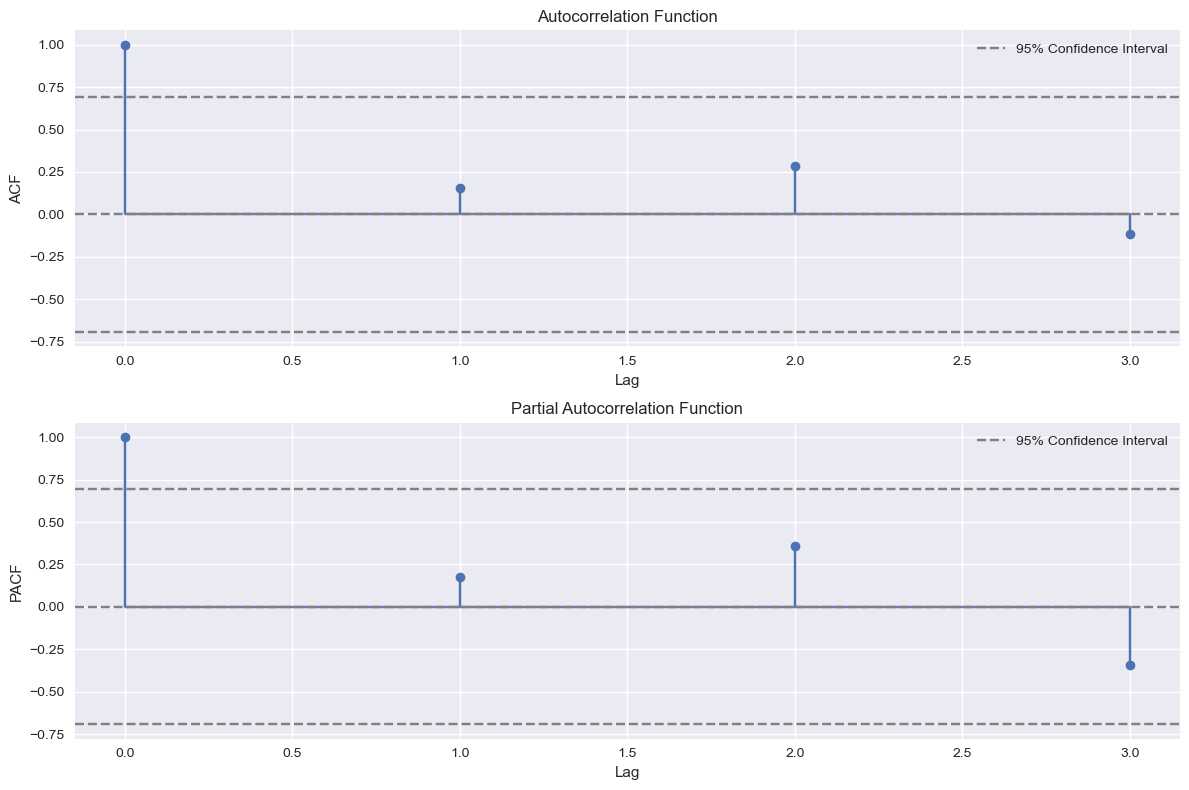


Interpretasi ACF dan PACF:
------------------------------
ACF values: ['0.155', '0.283', '-0.113']
PACF values: ['0.178', '0.357', '-0.341']

Saran parameter ARIMA berdasarkan ACF/PACF:
- Jumlah lag ACF signifikan: 0
- Jumlah lag PACF signifikan: 0
Mungkin proses ARMA seimbang (p ≈ q)

Mengecek stasioneritas data...
Hasil Augmented Dickey-Fuller Test:
ADF Statistic: 0.9665
p-value: 0.9939
Critical values:
	1%: -5.3543
	5%: -3.6462
	10%: -2.9012


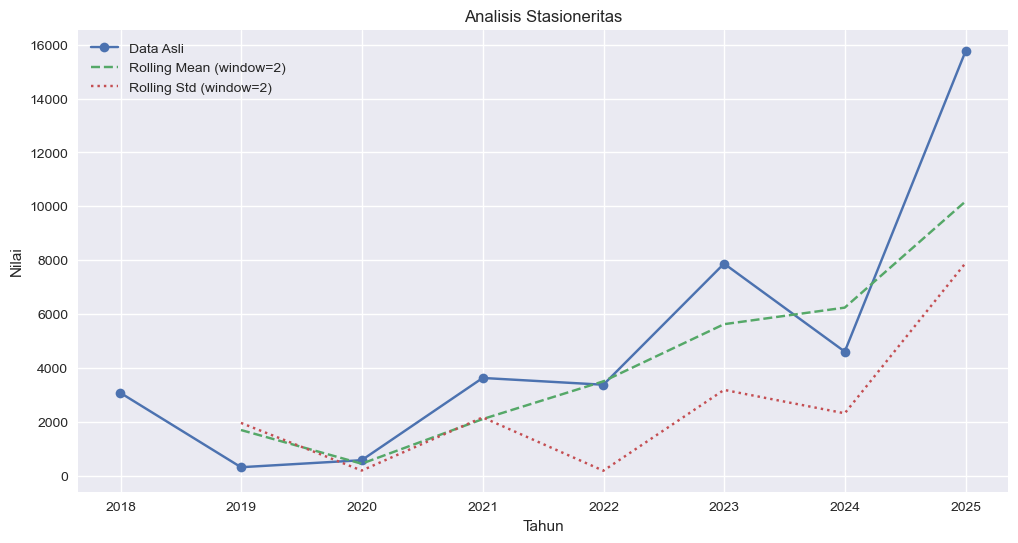


Analisis tambahan stasioneritas:
Standar deviasi: 4991.25
Koefisien variasi: 101.88%

Data belum stasioner

Pembagian data:
Training: 6 sampel
Testing: 2 sampel

Mencari parameter ARIMA terbaik...
ARIMA(0,0,0) - AIC: 114.88, RMSE: 8999.29
ARIMA(0,0,1) - AIC: 116.48, RMSE: 8881.19
ARIMA(0,0,2) - AIC: 116.94, RMSE: 7371.76
ARIMA(0,1,0) - AIC: 95.32, RMSE: 6050.47
ARIMA(0,1,1) - AIC: 97.02, RMSE: 6531.21


c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  

ARIMA(0,1,2) - AIC: 97.88, RMSE: 4871.38
ARIMA(1,0,0) - AIC: 116.53, RMSE: 8573.12
ARIMA(1,0,1) - AIC: 118.40, RMSE: 8523.61
ARIMA(1,0,2) - AIC: 118.95, RMSE: 7351.67
ARIMA(1,1,0) - AIC: 96.84, RMSE: 6435.64


c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  

ARIMA(1,1,1) - AIC: 972.38, RMSE: 6049.41
ARIMA(1,1,2) - AIC: 99.76, RMSE: 5294.38
ARIMA(2,0,0) - AIC: 118.33, RMSE: 8753.48
ARIMA(2,0,1) - AIC: 934.09, RMSE: 10804.90


c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC 

ARIMA(2,0,2) - AIC: 118.88, RMSE: 8476.05
ARIMA(2,1,0) - AIC: 98.70, RMSE: 5869.95
ARIMA(2,1,1) - AIC: 166.56, RMSE: 4489.35


c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,2) - AIC: 101.21, RMSE: 6660.37

Model ARIMA terbaik:
Parameter (p,d,q): (2, 1, 1)
RMSE: 4489.35
MAE: 3339.99
MAPE: 23.79%
R2 Score: 0.3546
AIC: 166.56


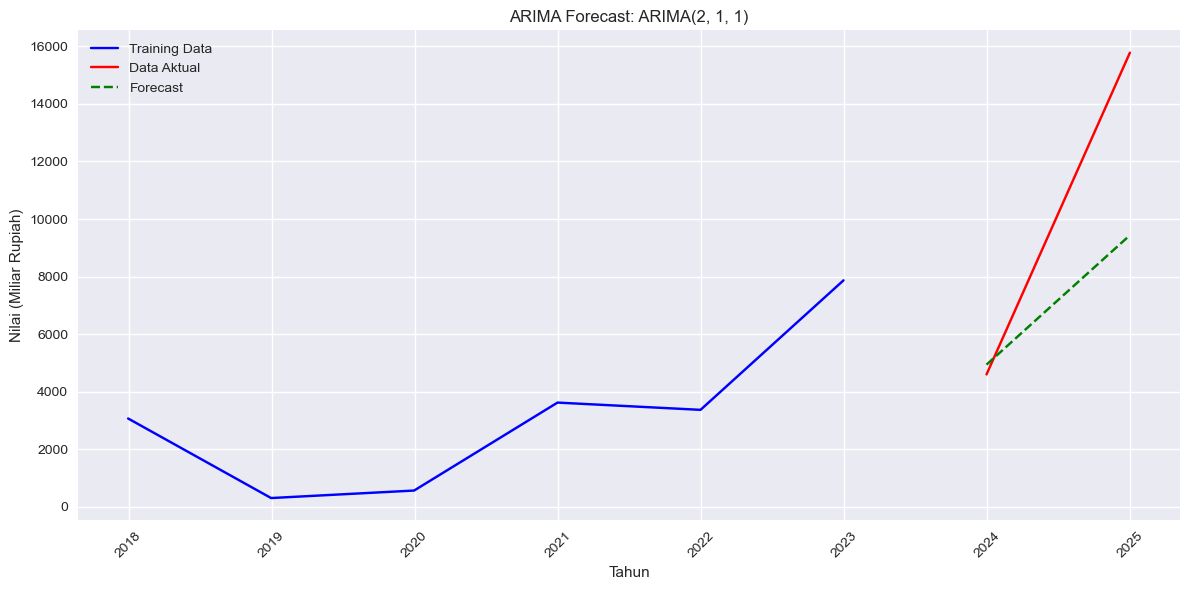


Memperkirakan nilai untuk 2 periode ke depan...


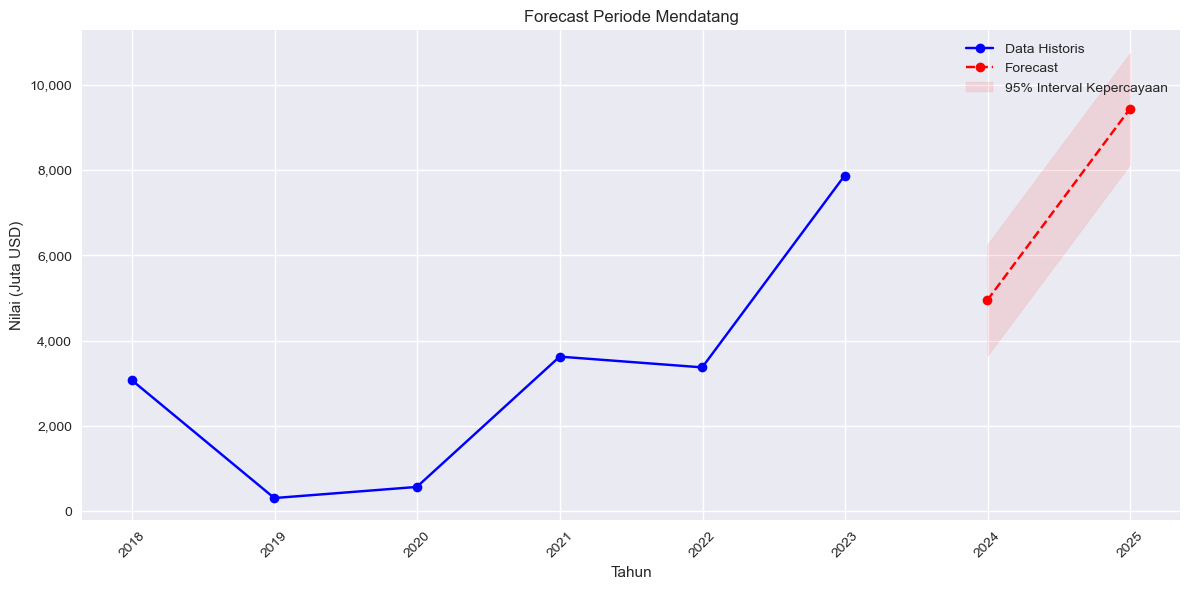


Hasil Forecast:
--------------------------------------------------

Tahun 2023:
  Prediksi        : 4,942.21 Juta USD
  Batas Bawah (95%): 3,630.50 Juta USD
  Batas Atas  (95%): 6,253.91 Juta USD
  Rentang         : 2,623.42 Juta USD

Tahun 2024:
  Prediksi        : 9,438.22 Juta USD
  Batas Bawah (95%): 8,126.45 Juta USD
  Batas Atas  (95%): 10,749.99 Juta USD
  Rentang         : 2,623.53 Juta USD

Model dan hasil forecast telah disimpan ke 'best_arima_model.pkl'

Analisis Forecast:
Rata-rata forecast: 7,190.21 Juta USD
Standar deviasi: 3,179.16 Juta USD
Koefisien variasi: 44.22%


In [46]:
# 4. Pemodelan ARIMA dan Forecasting (Fixed)
# ======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from itertools import product
import seaborn as sns
plt.style.use('seaborn-v0_8')

def load_data():
    """Load data time series yang sudah disiapkan"""
    try:
        ts = pd.read_csv('../data/time_series_data.csv', 
                        index_col=0, 
                        parse_dates=True)['Investasi Lainnya']
        print("Data berhasil dimuat.")
        return ts
    except:
        print("Error: Pastikan file time_series_data.csv tersedia di folder data")
        return None

def plot_acf_pacf(ts):
    """Plot ACF dan PACF untuk analisis parameter ARIMA"""
    max_lags = min(len(ts) // 2 - 1, 3)  # Maksimum lag yang diperbolehkan
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot ACF
    acf_values = acf(ts, nlags=max_lags)
    ax1.stem(range(len(acf_values)), acf_values)
    ax1.set_title('Autocorrelation Function')
    ax1.axhline(y=0, linestyle='--', color='gray')
    ax1.axhline(y=-1.96/np.sqrt(len(ts)), linestyle='--', color='gray', label='95% Confidence Interval')
    ax1.axhline(y=1.96/np.sqrt(len(ts)), linestyle='--', color='gray')
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('ACF')
    ax1.legend()
    
    # Plot PACF
    pacf_values = pacf(ts, nlags=max_lags)
    ax2.stem(range(len(pacf_values)), pacf_values)
    ax2.set_title('Partial Autocorrelation Function')
    ax2.axhline(y=0, linestyle='--', color='gray')
    ax2.axhline(y=-1.96/np.sqrt(len(ts)), linestyle='--', color='gray', label='95% Confidence Interval')
    ax2.axhline(y=1.96/np.sqrt(len(ts)), linestyle='--', color='gray')
    ax2.set_xlabel('Lag')
    ax2.set_ylabel('PACF')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Interpretasi hasil
    print("\nInterpretasi ACF dan PACF:")
    print("-" * 30)
    print("ACF values:", [f"{v:.3f}" for v in acf_values[1:]])  # Skip lag 0
    print("PACF values:", [f"{v:.3f}" for v in pacf_values[1:]])  # Skip lag 0
    
    # Saran parameter berdasarkan pola
    significant_acf = sum(abs(v) > 1.96/np.sqrt(len(ts)) for v in acf_values[1:])
    significant_pacf = sum(abs(v) > 1.96/np.sqrt(len(ts)) for v in pacf_values[1:])
    
    print("\nSaran parameter ARIMA berdasarkan ACF/PACF:")
    print(f"- Jumlah lag ACF signifikan: {significant_acf}")
    print(f"- Jumlah lag PACF signifikan: {significant_pacf}")
    if significant_acf > significant_pacf:
        print("Mungkin proses MA dominan (q > p)")
    elif significant_pacf > significant_acf:
        print("Mungkin proses AR dominan (p > q)")
    else:
        print("Mungkin proses ARMA seimbang (p ≈ q)")

def check_stationarity(ts):
    """Uji stasioneritas data dengan ADF test dan visualisasi"""
    # ADF Test
    result = adfuller(ts.dropna())
    print('Hasil Augmented Dickey-Fuller Test:')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    # Plot time series dan rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(ts, label='Data Asli', marker='o')
    
    # Rolling statistics
    window_size = 2  # Karena data terbatas
    roll_mean = ts.rolling(window=window_size).mean()
    roll_std = ts.rolling(window=window_size).std()
    
    plt.plot(roll_mean, label=f'Rolling Mean (window={window_size})', linestyle='--')
    plt.plot(roll_std, label=f'Rolling Std (window={window_size})', linestyle=':')
    plt.title('Analisis Stasioneritas')
    plt.xlabel('Tahun')
    plt.ylabel('Nilai')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Tambahan analisis
    print("\nAnalisis tambahan stasioneritas:")
    print(f"Standar deviasi: {ts.std():.2f}")
    print(f"Koefisien variasi: {ts.std()/abs(ts.mean()):.2%}")
    
    return result[1] < 0.05

def evaluate_arima(train, test, order):
    """Evaluasi model ARIMA dengan parameter tertentu"""
    try:
        # Fit model
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        
        # Forecast
        forecast = model_fit.forecast(steps=len(test))
        
        # Hitung metrik
        mse = mean_squared_error(test, forecast)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test, forecast)
        r2 = r2_score(test, forecast)
        mape = np.mean(np.abs((test - forecast) / test)) * 100
        
        return {
            'order': order,
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'r2': r2,
            'mape': mape,
            'aic': model_fit.aic,
            'bic': model_fit.bic,
            'model': model_fit,
            'forecast': forecast
        }
    except Exception as e:
        print(f"Error for ARIMA{order}: {str(e)}")
        return None

def plot_diagnostics(model):
    """Plot diagnostik residual model ARIMA"""
    residuals = pd.DataFrame(model.resid)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
    
    # Residual plot
    residuals.plot(title="Residuals", ax=ax1)
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Residual")
    
    # Q-Q plot
    import scipy.stats as stats
    stats.probplot(residuals.values.flatten(), dist="norm", plot=ax2)
    ax2.set_title("Normal Q-Q")
    
    # Histogram
    residuals.hist(ax=ax3, bins=20)
    ax3.set_title("Histogram")
    
    # ACF plot
    acf_values = acf(residuals.values.flatten(), nlags=10)
    ax4.stem(range(len(acf_values)), acf_values)
    ax4.set_title("ACF of Residuals")
    ax4.axhline(y=0, linestyle='--', color='gray')
    ax4.axhline(y=-1.96/np.sqrt(len(residuals)), linestyle='--', color='gray')
    ax4.axhline(y=1.96/np.sqrt(len(residuals)), linestyle='--', color='gray')
    
    plt.tight_layout()
    plt.show()

def forecast_future(model, steps=2):
    """Forecast untuk periode mendatang dengan interval kepercayaan"""
    # Dapatkan data historis
    history = model.data.orig_endog
    if isinstance(history, pd.Series):
        historical_dates = history.index
    else:
        historical_dates = pd.date_range(start='2017', periods=len(history), freq='Y')
    
    # Buat forecast
    forecast_result = model.get_forecast(steps=steps)
    forecast_mean = forecast_result.predicted_mean
    forecast_ci = forecast_result.conf_int()
    
    # Buat tanggal untuk forecast
    last_date = historical_dates[-1]
    forecast_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), 
                                 periods=steps, 
                                 freq='Y')
    
    # Plot
    plt.figure(figsize=(12, 6))
    
    # Plot data historis
    plt.plot(historical_dates, history, 
            label='Data Historis', 
            color='blue', 
            marker='o')
    
    # Plot forecast
    plt.plot(forecast_dates, forecast_mean, 
            label='Forecast', 
            color='red', 
            marker='o', 
            linestyle='--')
    
    # Plot interval kepercayaan
    plt.fill_between(forecast_dates,
                    forecast_ci.iloc[:, 0],  # Lower bound
                    forecast_ci.iloc[:, 1],  # Upper bound
                    color='red',
                    alpha=0.1,
                    label='95% Interval Kepercayaan')
    
    plt.title('Forecast Periode Mendatang')
    plt.xlabel('Tahun')
    plt.ylabel('Nilai (Juta USD)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Format angka pada sumbu y
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.tight_layout()
    plt.show()
    
    # Buat series untuk forecast
    forecast_series = pd.Series(forecast_mean, index=forecast_dates)
    
    # Print hasil forecast
    print("\nHasil Forecast:")
    print("-" * 50)
    for i, (date, value) in enumerate(forecast_series.items()):
        lower = forecast_ci.iloc[i, 0]
        upper = forecast_ci.iloc[i, 1]
        print(f"\nTahun {date.year}:")
        print(f"  Prediksi        : {value:,.2f} Juta USD")
        print(f"  Batas Bawah (95%): {lower:,.2f} Juta USD")
        print(f"  Batas Atas  (95%): {upper:,.2f} Juta USD")
        print(f"  Rentang         : {upper-lower:,.2f} Juta USD")
    
    return forecast_series, forecast_ci
if __name__ == "__main__":
    # Load data
    ts = load_data()
    if ts is None:
        exit()
        
    print("\nRingkasan Data:")
    print("-" * 30)
    print(ts.describe())
    
    # Analisis awal data
    print("\nAnalisis ACF dan PACF untuk identifikasi parameter:")
    plot_acf_pacf(ts)
    
    # Cek stasioneritas
    print("\nMengecek stasioneritas data...")
    is_stationary = check_stationarity(ts)
    print(f"\nData {'sudah' if is_stationary else 'belum'} stasioner")
    
    # Split data
    train, test = split_data(ts, train_size=0.75)
    print("\nPembagian data:")
    print(f"Training: {len(train)} sampel")
    print(f"Testing: {len(test)} sampel")
    
    # Grid search untuk parameter terbaik
    best_model, all_results = grid_search_arima(train, test)
    
    if best_model:
        print("\nModel ARIMA terbaik:")
        print(f"Parameter (p,d,q): {best_model['order']}")
        print(f"RMSE: {best_model['rmse']:.2f}")
        print(f"MAE: {best_model['mae']:.2f}")
        print(f"MAPE: {best_model['mape']:.2f}%")
        print(f"R2 Score: {best_model['r2']:.4f}")
        print(f"AIC: {best_model['aic']:.2f}")
        
        # Plot hasil
        plot_results(train, test, best_model['forecast'], 
                    f"ARIMA{best_model['order']}")
        
        # Forecast periode mendatang
        print("\nMemperkirakan nilai untuk 2 periode ke depan...")
        future, conf_int = forecast_future(best_model['model'], steps=2)
        
        # Simpan hasil
        model_info = {
            'order': best_model['order'],
            'metrics': {
                'rmse': best_model['rmse'],
                'mae': best_model['mae'],
                'mape': best_model['mape'],
                'r2': best_model['r2'],
                'aic': best_model['aic']
            },
            'forecast': {
                'point_estimates': future.to_dict(),
                'confidence_intervals': {
                    'lower': conf_int.iloc[:, 0].to_dict(),
                    'upper': conf_int.iloc[:, 1].to_dict()
                }
            }
        }
        
        # Simpan model
        pd.to_pickle(model_info, '../data/best_arima_model.pkl')
        print("\nModel dan hasil forecast telah disimpan ke 'best_arima_model.pkl'")
        
        # Analisis hasil forecast
        mean_forecast = future.mean()
        std_forecast = future.std()
        print("\nAnalisis Forecast:")
        print(f"Rata-rata forecast: {mean_forecast:,.2f} Juta USD")
        print(f"Standar deviasi: {std_forecast:,.2f} Juta USD")
        print(f"Koefisien variasi: {(std_forecast/abs(mean_forecast))*100:.2f}%")
    else:
        print("Tidak dapat menemukan model ARIMA yang sesuai.")